## Anomaliedetektion mit Iris_extended

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris_df = pd.read_csv('/home/michelle/Documents/Master_Sem1/Künstliche_Intelligenz/OneDrive_1_12.10.2023/Datensätze/iris_data.csv')

<class 'pandas.core.frame.DataFrame'>


In [3]:
iris_df.head()

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
0,28,0.923077,0.803775,42.769815,97.239460,115.102867,19.023609,0
1,68,0.979804,0.836557,63.621205,104.295904,104.446747,29.446747,0
2,51,0.760961,0.823015,59.701164,99.514131,103.025769,32.987531,0
3,31,0.957265,0.767948,50.077372,116.466180,137.658394,22.445255,0
4,50,0.828162,0.845766,60.658955,104.919383,113.961094,34.713985,0


In [4]:
iris_df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
zusatz = pd.DataFrame([[3.2,1.8,3.2,2.7,'other']],columns=['sepal_length',
                                                      'sepal_width',
                                                      'petal_length',
                                                      'petal_width',
                                                        'species'])

In [6]:
zusatz.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,3.2,1.8,3.2,2.7,other


In [7]:
#iris_df_ext = iris_df

In [8]:
#iris_df_ext = iris_df.append(zusatz, ignore_index=True)
iris_df_ext = pd.concat([iris_df, zusatz], ignore_index=True)

In [9]:
iris_df_ext.shape

(151, 5)

In [10]:
iris_df_ext.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,3.2,1.8,3.2,2.7,other


In [11]:
iris_df_ext.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,151.000000,151.000000,151.000000,151.000000
mean,5.825828,3.045695,3.754967,1.208609
std,0.852875,0.444032,1.759117,0.770363
min,3.200000,1.800000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.700000


Scatterplot von 2 Merkmalen: Shaftblattlänge zu Breite
Verschiedene Species unterschiedlich einfärben
--> Klassifikationsmöglichkeit beurteilen

In [12]:
colors = {'setosa':'r','versicolor':'g','virginica':'b','other':'m'} # Farben für Kategorien

Text(0, 0.5, 'Sepal_Width')

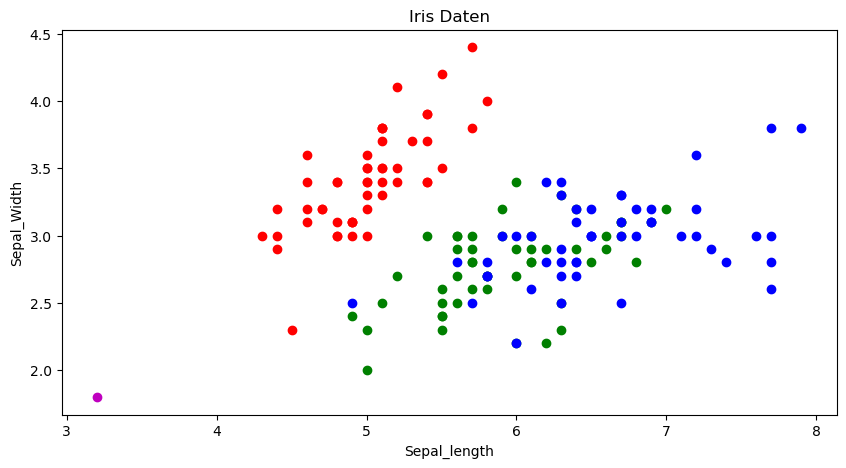

In [13]:
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren

for i  in range(len(iris_df_ext['sepal_length'])):
    ax.scatter(iris_df_ext['sepal_length'][i],
               iris_df_ext['sepal_width'][i],
               color=colors[iris_df_ext['species'][i]])
    
ax.set_title('Iris Daten')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_Width')

Klassen statt mit Namen mit Zahlen bezeichnen

In [14]:
species_to_int ={'setosa':0,'versicolor':1, 'virginica':2, 'other':3} # Für jede Klasse eindeutige Zahl setzen

iris_df_ext['species']=iris_df_ext['species'].map(species_to_int) # Klassenspalte überschreiben mit Zahlen
iris_df_ext.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Daten nach Merkmalsmatrix und Ergebnisvektor (Klassifikation) trennen

In [15]:
X = iris_df_ext.iloc[:,:-1] #alles außer letzter Spalte
y = iris_df_ext.iloc[:,-1] #nur letzte Spalte

In [16]:
X.shape

(151, 4)

In [17]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
print('Ergebnisspaltengroesse: ',y.shape)

Ergebnisspaltengroesse:  (151,)


IsolationForest

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
iForest_clf = IsolationForest(random_state=0).fit(X)

In [21]:
Xzusatz=iris_df_ext.iloc[150:,:-1]

In [22]:
Xzusatz.head()

,sepal_length,sepal_width,petal_length,petal_width
150,3.2,1.8,3.2,2.7


In [23]:
iForest_clf.predict(Xzusatz) #Vorhersage., ob Outlier oder nicht

array([-1])

K-means-Clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
#Xfeld = X.values

In [26]:
kmeans = KMeans(n_clusters=3)

In [27]:
y_pred=kmeans.fit_predict(X)

/home/michelle/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2],
      dtype=int32)

In [29]:
y_pred is kmeans.labels_

True

In [30]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.84032258, 2.72580645, 4.36935484, 1.45483871]])

Text(0, 0.5, 'Sepal_Width')

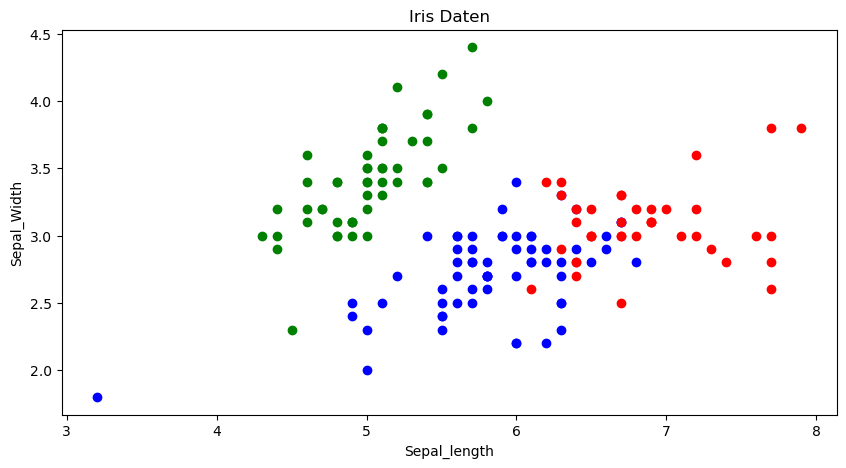

In [31]:
colors = {0:'r',1:'g',2:'b',-1:'m'} # Farben für Kategorien
 
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren
 
for i in range(len(iris_df_ext['sepal_length'])):
    ax.scatter(iris_df_ext['sepal_length'][i],
               iris_df_ext['sepal_width'][i],
               color=colors[y_pred[i]])  # Punkte entsprechend den Klassen einfärben
   
ax.set_title('Iris Daten')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_Width')

DBScan

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [33]:
XMoons, yMoons = make_moons(n_samples=1000, noise=0.5)
dbscan=DBSCAN(eps=0.15, min_samples=5) # Spiele mit eps-Wert (start bei 0.05)
dbscan.fit(XMoons)

DBSCAN(eps=0.15)

In [34]:
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  8,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  8,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0, -1,  1,  8,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  4,
        0,  5, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  5, -1,  0,  0,  0,
       -1, -1,  0,  0,  0

Text(0, 0.5, 'Sepal_Width')

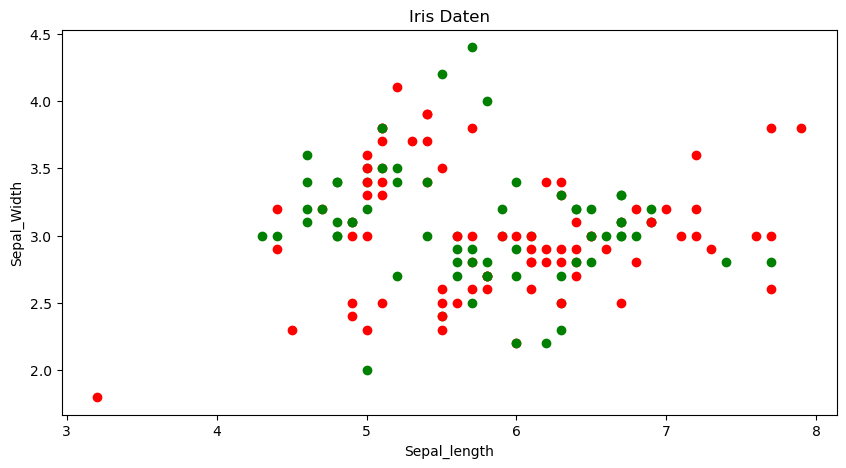

In [35]:
colors = {0:'r',1:'g',2:'b',-1:'m'} # Farben für Kategorien
 
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren
 
for i in range(len(iris_df_ext['sepal_length'])):
    ax.scatter(iris_df_ext['sepal_length'][i],
               iris_df_ext['sepal_width'][i],
               color=colors[yMoons[i]])  # Punkte entsprechend den Klassen einfärben
        
ax.set_title('Iris Daten')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_Width')